In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.data as data
import skimage.color as color
import skimage
import math
import cv2
from skimage.transform import hough_line, hough_line_peaks,probabilistic_hough_line
from skimage.draw import line

C:\Users\Ania\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


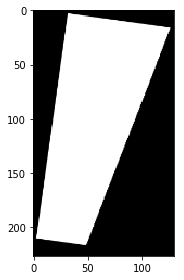

In [3]:
img = io.imread('18.png')
io.imshow(img)

[[[125.44792    15.632093   32.84845     2.5882595]]

 [[ 31.380278    3.2308836   2.4448373 209.63013  ]]

 [[ 48.447277  216.02992   126.044044   16.06747  ]]

 [[  3.1954246 210.1252     47.12992   216.31583  ]]]


C:\Users\Ania\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


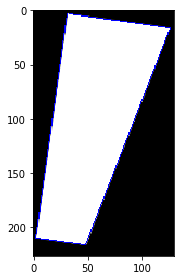

In [15]:

#Read gray image
#img = cv2.imread("test.png",0)

#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(0)

#Detect lines in the image
lines = lsd.detect(img)[0] #Position 0 of the returned tuple are the detected lines
print(lines)
#Draw detected lines in the image
drawn_img = lsd.drawSegments(img,lines)

#Show image
io.imshow(drawn_img)
#cv2.imshow(drawn_img)
#cv2.waitKey(0)

In [7]:
lsd = cv2.createLineSegmentDetector(0)
dlines = lsd.detect(img)
for dline in dlines[0]:
    x0 = int(round(dline[0][0]))
    y0 = int(round(dline[0][1]))
    x1 = int(round(dline[0][2]))
    y1 = int(round(dline[0][3]))
    cv2.line(mask, (x0, y0), (x1,y1), 255, 1, cv2.LINE_AA)

NameError: name 'mask' is not defined

In [38]:
# Compute the Euclidean norm
def hypot( x,  y):
    return math.sqrt(x * x + y * y)
        
 
def RadiansToDegrees( radians):
    degree = 180 * radians / math.pi
    return degree

 
def GetDistance( x1,  y1,  x2,  y2):
    return hypot(x2 - x1, y2 - y1)
        
 
def GetAngle( x1,y1,x2,y2,x3,y3):
    a = GetDistance(x3,y3,x2,y2)
    b = GetDistance(x1,y1,x3,y3)
    c = GetDistance(x1,y1,x2,y2)
            
    radians = math.acos((a * a + c * c - b * b) / (2 * a * c))
    return RadiansToDegrees(radians);
    
def Angle(a,b,c):
    radians = math.acos((a * a + c * c - b * b) / (2 * a * c))
    return RadiansToDegrees(radians);
    

In [41]:
dist=[]
for i in lines:
    for z in i:
        
        dist.append([z[0],z[1]])
print(dist) #wierzcholki
print(GetAngle(dist[0][0],dist[0][1],dist[1][0],dist[1][1],dist[2][0],dist[2][1]))

[[125.44792, 15.632093], [31.380278, 3.2308836], [48.447277, 216.02992], [3.1954246, 210.1252]]
77.90438934096788
